In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Import ticker (one-to-five letters, numbers, or symbols used to identify companies and stuff e.g. GOOG, VOO) AMZN is amazon
dat = yf.Ticker("AMZN")

# Get the five year history in intervals of days
df = dat.history(period='5y', interval='1d')
df.head()



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-16 00:00:00-05:00,162.702499,165.414993,162.679504,163.447495,51494000,0.0,0.0
2021-02-17 00:00:00-05:00,163.179993,166.045502,162.975006,165.432007,65950000,0.0,0.0
2021-02-18 00:00:00-05:00,164.121002,166.899994,163.697006,166.411499,60548000,0.0,0.0
2021-02-19 00:00:00-05:00,166.411499,166.675003,162.287506,162.494995,86104000,0.0,0.0
2021-02-22 00:00:00-05:00,160.406494,161.615997,158.613007,159.037003,70314000,0.0,0.0


In [2]:
# Only useful columns cut out the not needed ones
importantColumns = ['Open', 'High', 'Low', 'Close', 'Volume']
df = df[importantColumns]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-02-16 00:00:00-05:00,162.702499,165.414993,162.679504,163.447495,51494000
2021-02-17 00:00:00-05:00,163.179993,166.045502,162.975006,165.432007,65950000
2021-02-18 00:00:00-05:00,164.121002,166.899994,163.697006,166.411499,60548000
2021-02-19 00:00:00-05:00,166.411499,166.675003,162.287506,162.494995,86104000
2021-02-22 00:00:00-05:00,160.406494,161.615997,158.613007,159.037003,70314000


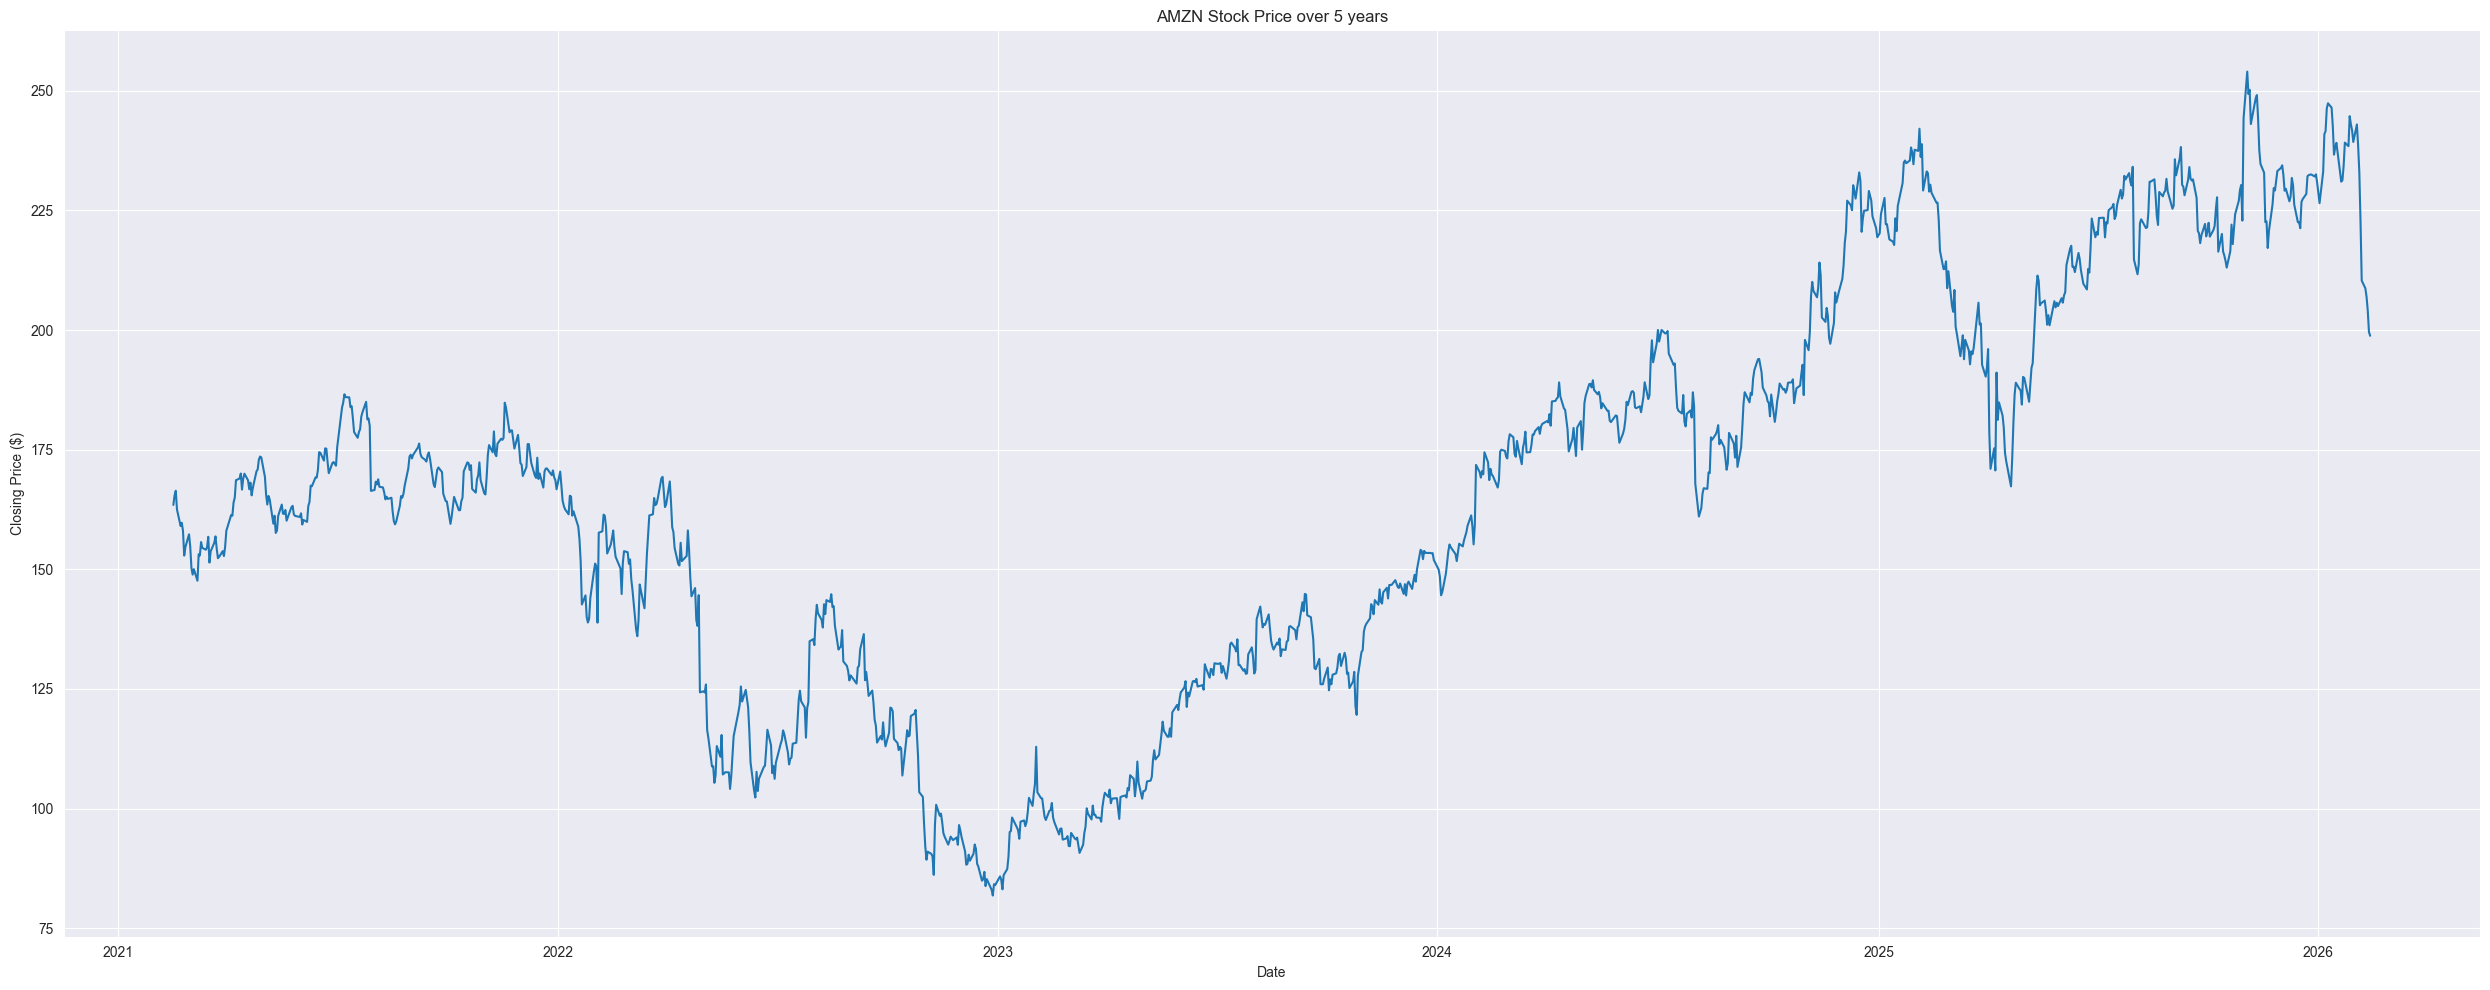

In [3]:
# Use seaborn to visualize the stock in the five year period

# Line graph 
plt.figure(figsize=(25,10))
sb.set_style("darkgrid")
sb.lineplot(data=df, x=df.index, y="Close" )
plt.title("AMZN Stock Price over 5 years")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.tight_layout()
plt.show()

### Moving Average

Now I want to smooth out the data by finding the *moving average*.

What is the moving average first of all? 

The purpose is to smooth the time series data and find trends, the number of points is based off the time period you want e.g. weeks = 7 point moving average, month = 12 point moving average. The higher the moving average point becomes the more smoother the data becomes but the more points we lose e.g. losing 2 at the front and 2 at the end.

### Types of Moving Average

I realized that there are three types of moving averages:

1. Simple Moving Average (SMA):
The SMA is a technical indicator that calculates the average price of an asset over a specific number of periods (e.g., 10, 50, 200 days) to smooth out short-term price fluctuations and identify trends. Calculated as the unweighted mean of past data points, it helps traders determine potential buy/sell signals, support, and resistance levels

Calculation: The formula for SMA is the sum of closing prices over a set number of periods (n) divided by n.

$$
SMA = (A1 + A2 + A3 + ... + An) / n
$$

2. Exponential Moving Average (EMA):
The EMA is a technical chart indicator that tracks price trends by applying more weight and significance to recent data points. Essentially it reacts much more due to its exponential nature and reacts faster to price fluctuations so is most optimal for short-term trading.

3. Cumulative Moving Average (CMA):
The CMA or running average calculates the mean of all data points up to the current time updating with each new data entry, unlike a simple moving average which is more like a sliding window this acts in way which incorporates the entire history making it ideal for when monitoring long term trends rather then short term fluctuations.



We will focus on the SMA for now since its the most simple and easy to understand...

We should ask questions afterwards to find trends.

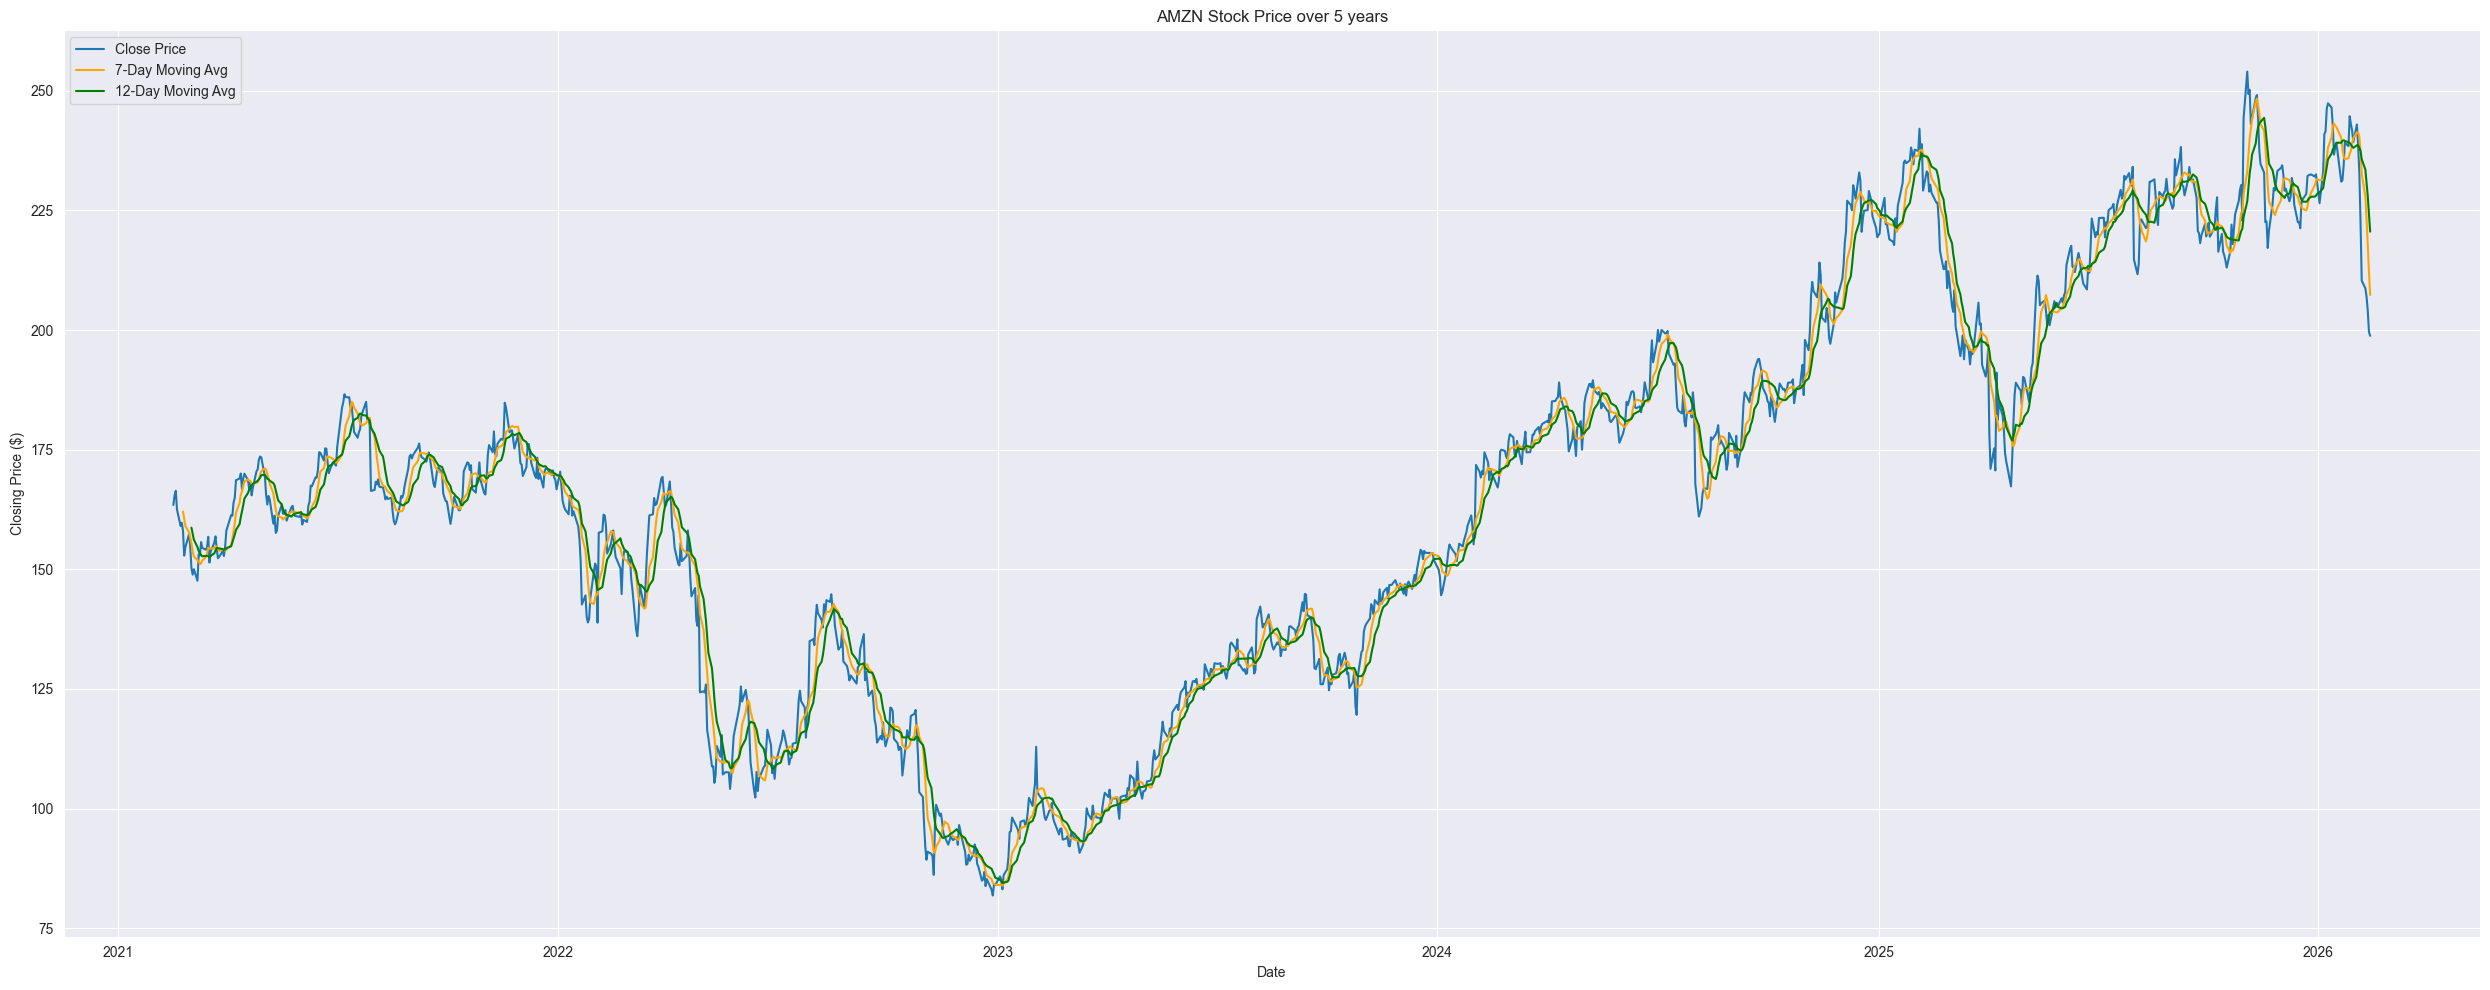

In [19]:
# Implement moving average

df['SFA7'] = df['Close'].rolling(window=7).mean()
df['SFA12'] = df['Close'].rolling(window=12).mean()
df['EMA'] = df['Close'].ewm(span=5).mean()
plt.figure(figsize=(25,10))
sb.set_style("darkgrid")

# Original closing price
sb.lineplot(data=df, x=df.index, y="Close", label="Close Price" )

# 7 day moving average
sb.lineplot(data=df, x=df.index, y="SFA7", label="7-Day Moving Avg", color="orange")

# 12 month moving average
sb.lineplot(data=df, x=df.index, y="SFA12", label="12-Day Moving Avg", color="green")


plt.title("AMZN Stock Price over 5 years")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.tight_layout()
plt.show()

If the price is above the moving overage then it suggest a up trend but if its below then it suggest a down MEANING as of writing this 15/02/2026 Amazon is looking very bearish. Only time will tell on how low it will drop though.

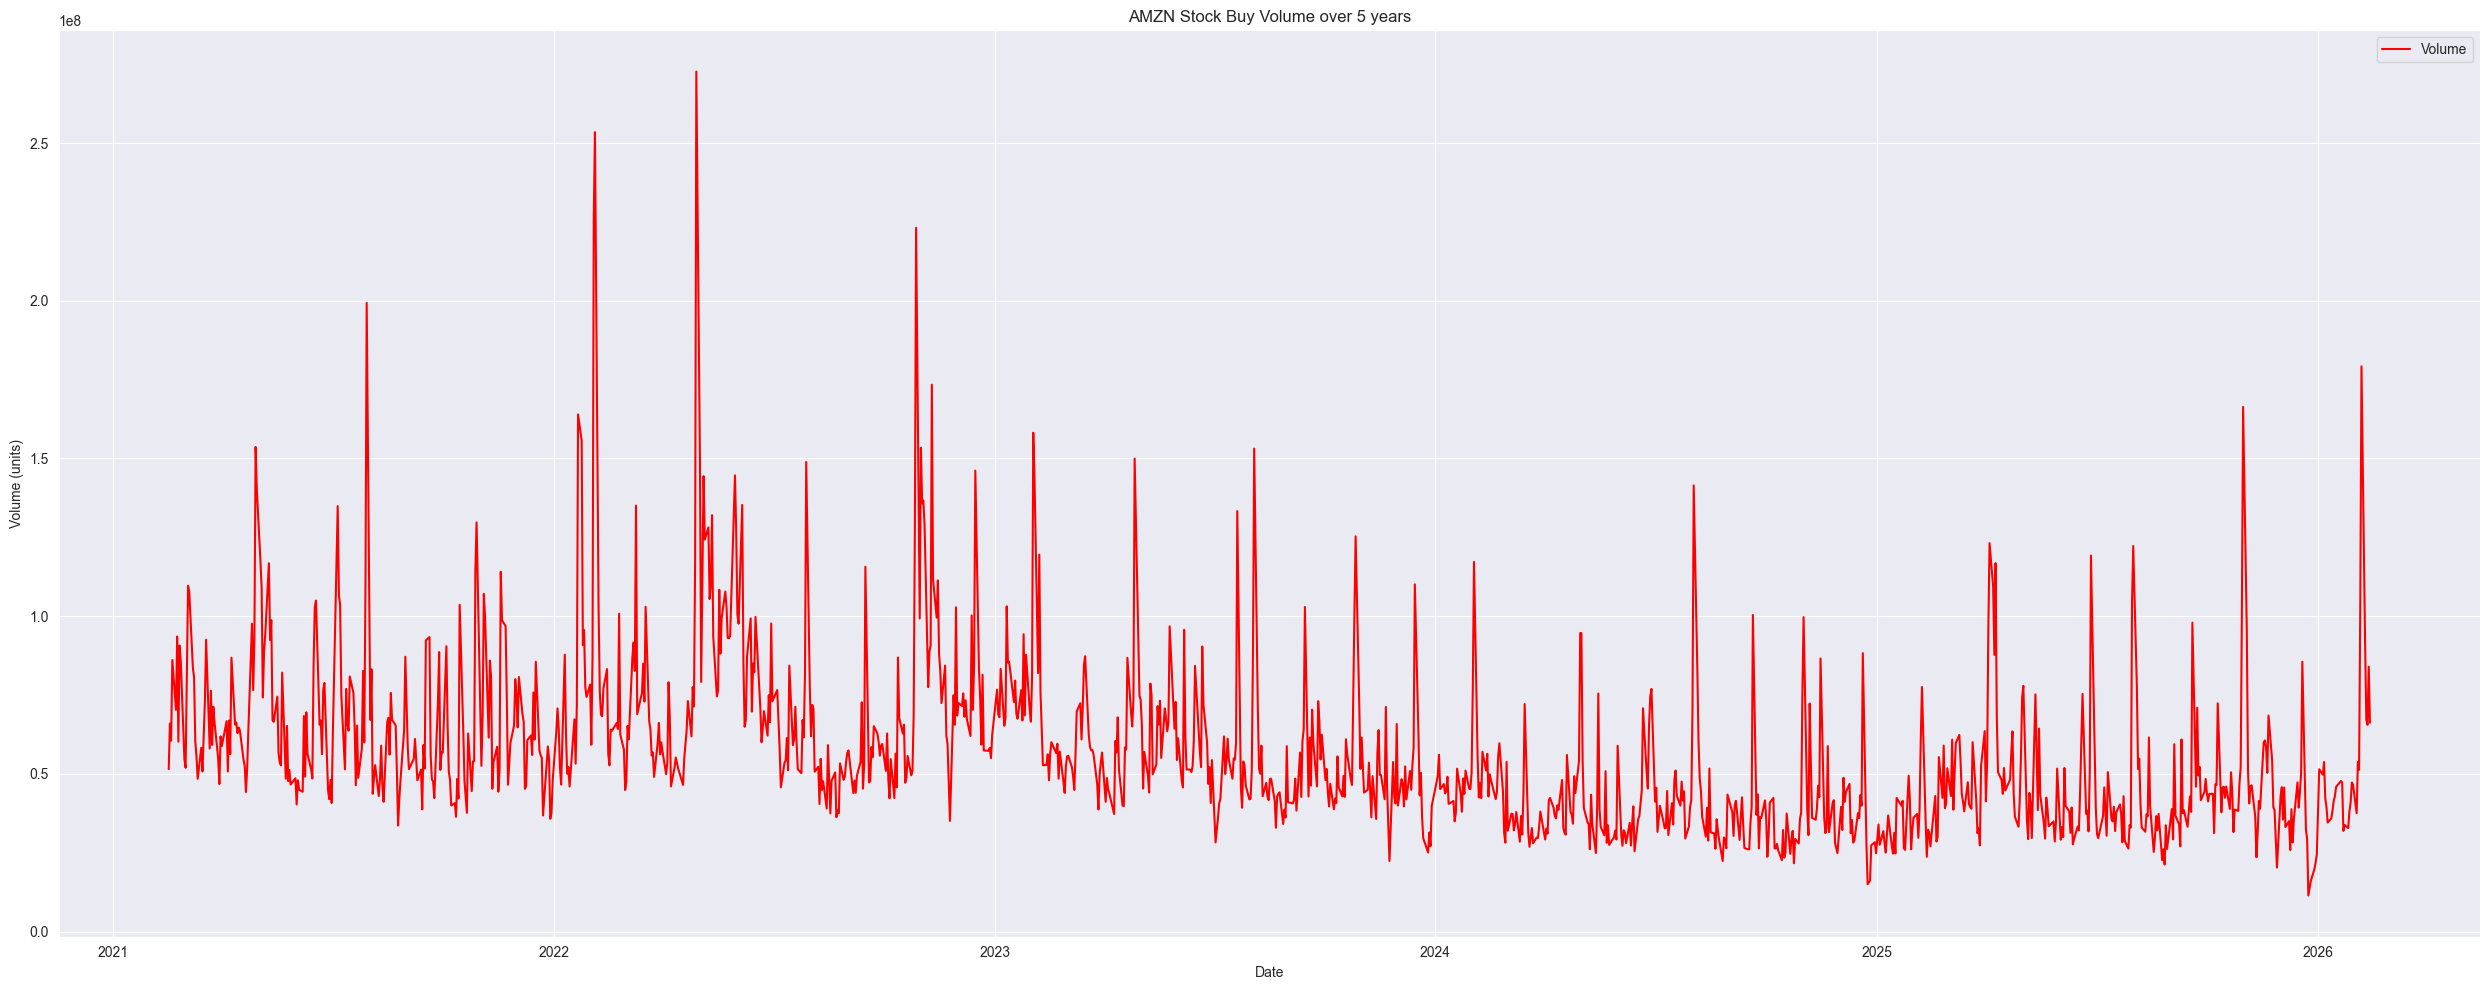

In [20]:
plt.figure(figsize=(25,10))
sb.set_style("darkgrid")

# Volume
sb.lineplot(data=df, x=df.index, y="Volume", label="Volume", color="red")


plt.title("AMZN Stock Buy Volume over 5 years")
plt.xlabel("Date")
plt.ylabel("Volume (units)")
plt.tight_layout()
plt.show()